In [1]:
import numpy as np
from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Noto Serif SC'
plt.rcParams['font.sans-serif'] = ['Noto Serif SC']

In [2]:
from data_process import X_train, X_test, y_train, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Path to dataset files: /home/tibless/.cache/kagglehub/datasets/drsaeedmohsen/ucihar-dataset/versions/1/UCI-HAR Dataset
X_train 形状: (7352, 9, 128)
y_train 形状: (7352, 6)
X_test  形状: (2947, 9, 128)
y_test  形状: (2947, 6)
(7352, 9, 128)
(7352, 6)
(2947, 9, 128)
(2947, 6)


In [3]:
def deone_hot(x):
    return np.argmax(x, axis=1)

y_test_proba = y_test
y_train_proba = y_train
y_test = deone_hot(y_test)
y_train = deone_hot(y_train)

In [4]:
y2name = [
    'Walking',
    'Walking Upstairs',
    'Walking Downstairs',
    'Sitting',
    'Standing',
    'Lying Down',
]

x2name = [
    'body_acc_x',
    'body_acc_y',
    'body_acc_z',
    'body_gyro_x',
    'body_gyro_y',
    'body_gyro_z',
    'total_acc_x',
    'total_acc_y',
    'total_acc_z',
]

In [5]:
raw_seqs = []
raw_labels = []

splits = []
for i in range(X_train.shape[0] - 1):
    if not (X_train[i][0, 64:] == X_train[i + 1][0, :64]).all():
        splits.append(i + 1)
        raw_labels.append(y_train[i])

raw_labels.append(y_train[-1])

L = [0] + splits
R = splits + [X_train.shape[0] - 1]

for l, r in zip(L, R):
    # [l, r)
    length = (r - l + 1) * 64
    x = jnp.zeros((9, length))
    for i, j in enumerate(range(l, r)):
        x = x.at[:, i*64:i*64+64].set(
            X_train[j][:, :64] 
        ) 

    x = x.at[:, -64:].set(
        X_train[r - 1][:, 64:]
    )
    raw_seqs.append(x)

In [6]:
print(len(raw_seqs))
print(len(raw_labels))

600
600


In [7]:
def shiyan1(ix, num, hide_raw=False, random=True):
    if random:
        ix = np.random.randint(len(raw_seqs))
    
    seq = raw_seqs[ix]
    
    fig, axs = plt.subplots(3, 3, figsize=(20, 10))
    
    axs = axs.ravel()
    
    for i, ax in enumerate(axs):
        subseq = seq[i]
        seq_len = subseq.shape[0]
    
        if not hide_raw:
            xx = [subseq[ix::1] for ix in range(1)]
            for j, subsubseq in enumerate(xx):
                ax.plot(range(j, seq_len, 1), xx[j], label=f'{x2name[i]}, raw', color='r')
     
        
        # xx = [subseq[ix::num] for ix in range(num)]
        # for j, subsubseq in enumerate(xx):
        #     ax.plot(range(j, seq_len, num), xx[j], label=f'{x2name[i]}:{j}')
    
        ax.tick_params(axis='x', direction='in')
        ax.tick_params(axis='y', direction='in')
        # ax.set_ylim(ylim[i][0], ylim[i][1])
        ax.legend()

    plt.suptitle(f'Label: {y2name[raw_labels[ix]]}', fontsize=20)
    fig.tight_layout()
    plt.show()

In [8]:
l0 = [i for i, x in enumerate(raw_labels) if int(x) == 0]  # Walk 
l1 = [i for i, x in enumerate(raw_labels) if int(x) == 1]  # Walk Up
l2 = [i for i, x in enumerate(raw_labels) if int(x) == 2]  # Walk Down
l3 = [i for i, x in enumerate(raw_labels) if int(x) == 3]  # Sit
l4 = [i for i, x in enumerate(raw_labels) if int(x) == 4]  # Stand
l5 = [i for i, x in enumerate(raw_labels) if int(x) == 5]  # Lying

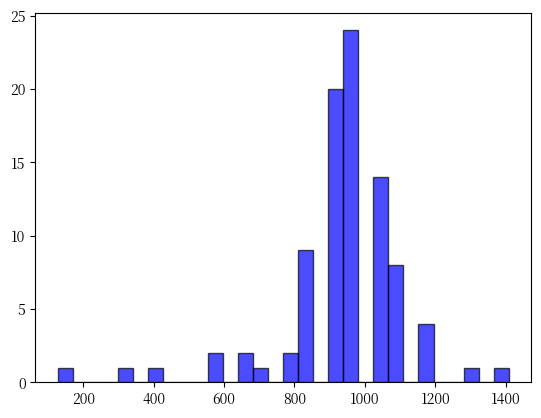

In [9]:
ll0 = []
for ix in l0:
    ll0.append(raw_seqs[ix].shape[1])

plt.hist(ll0, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

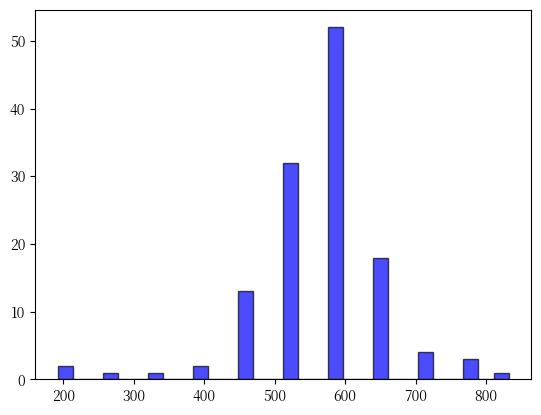

In [10]:
ll1 = []
for ix in l2:
    ll1.append(raw_seqs[ix].shape[1])

plt.hist(ll1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

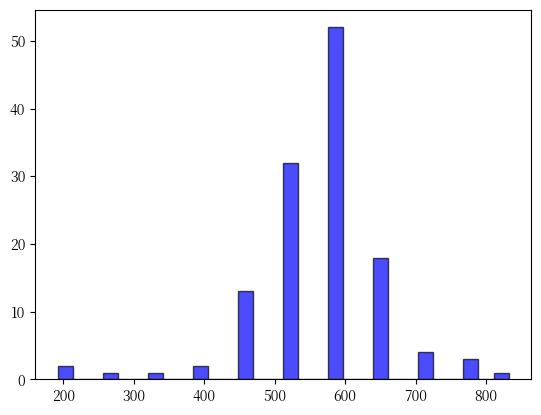

In [11]:
ll2 = []
for ix in l2:
    ll2.append(raw_seqs[ix].shape[1])

plt.hist(ll2, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

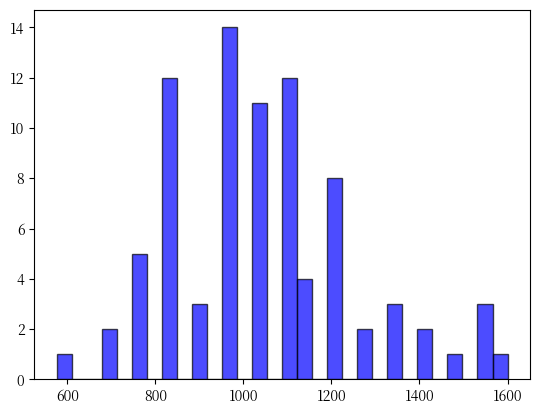

In [12]:
ll3 = []
for ix in l3:
    ll3.append(raw_seqs[ix].shape[1])

plt.hist(ll3, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

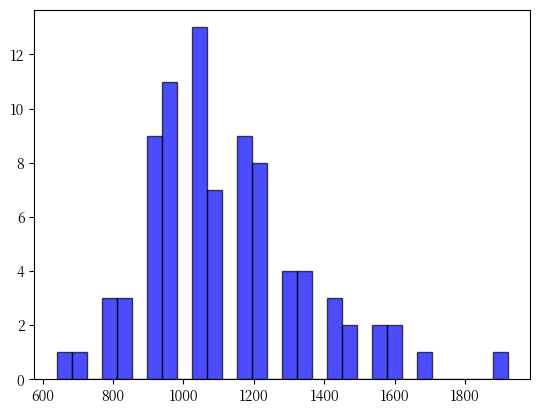

In [13]:
ll4 = []
for ix in l4:
    ll4.append(raw_seqs[ix].shape[1])

plt.hist(ll4, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

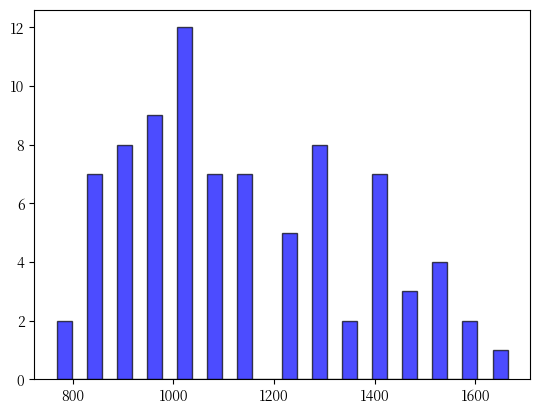

In [14]:
ll5 = []
for ix in l5:
    ll5.append(raw_seqs[ix].shape[1])

plt.hist(ll5, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.show()

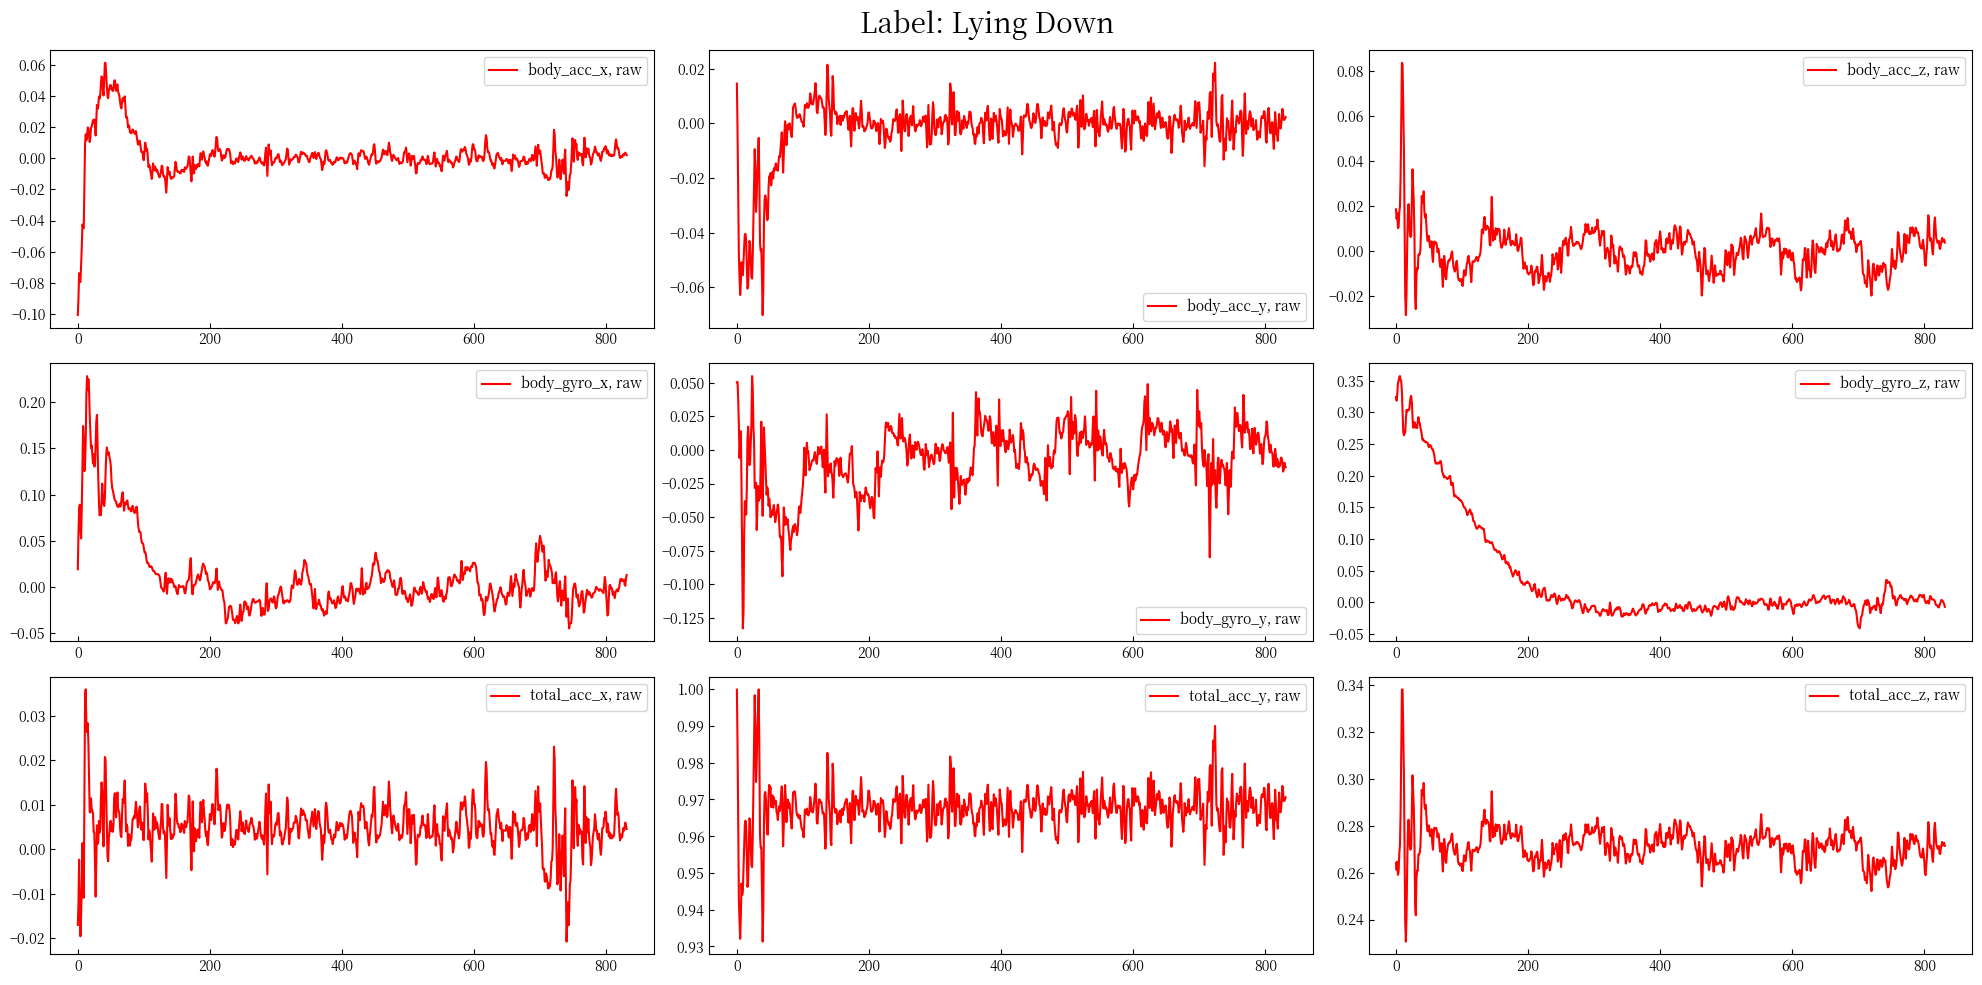

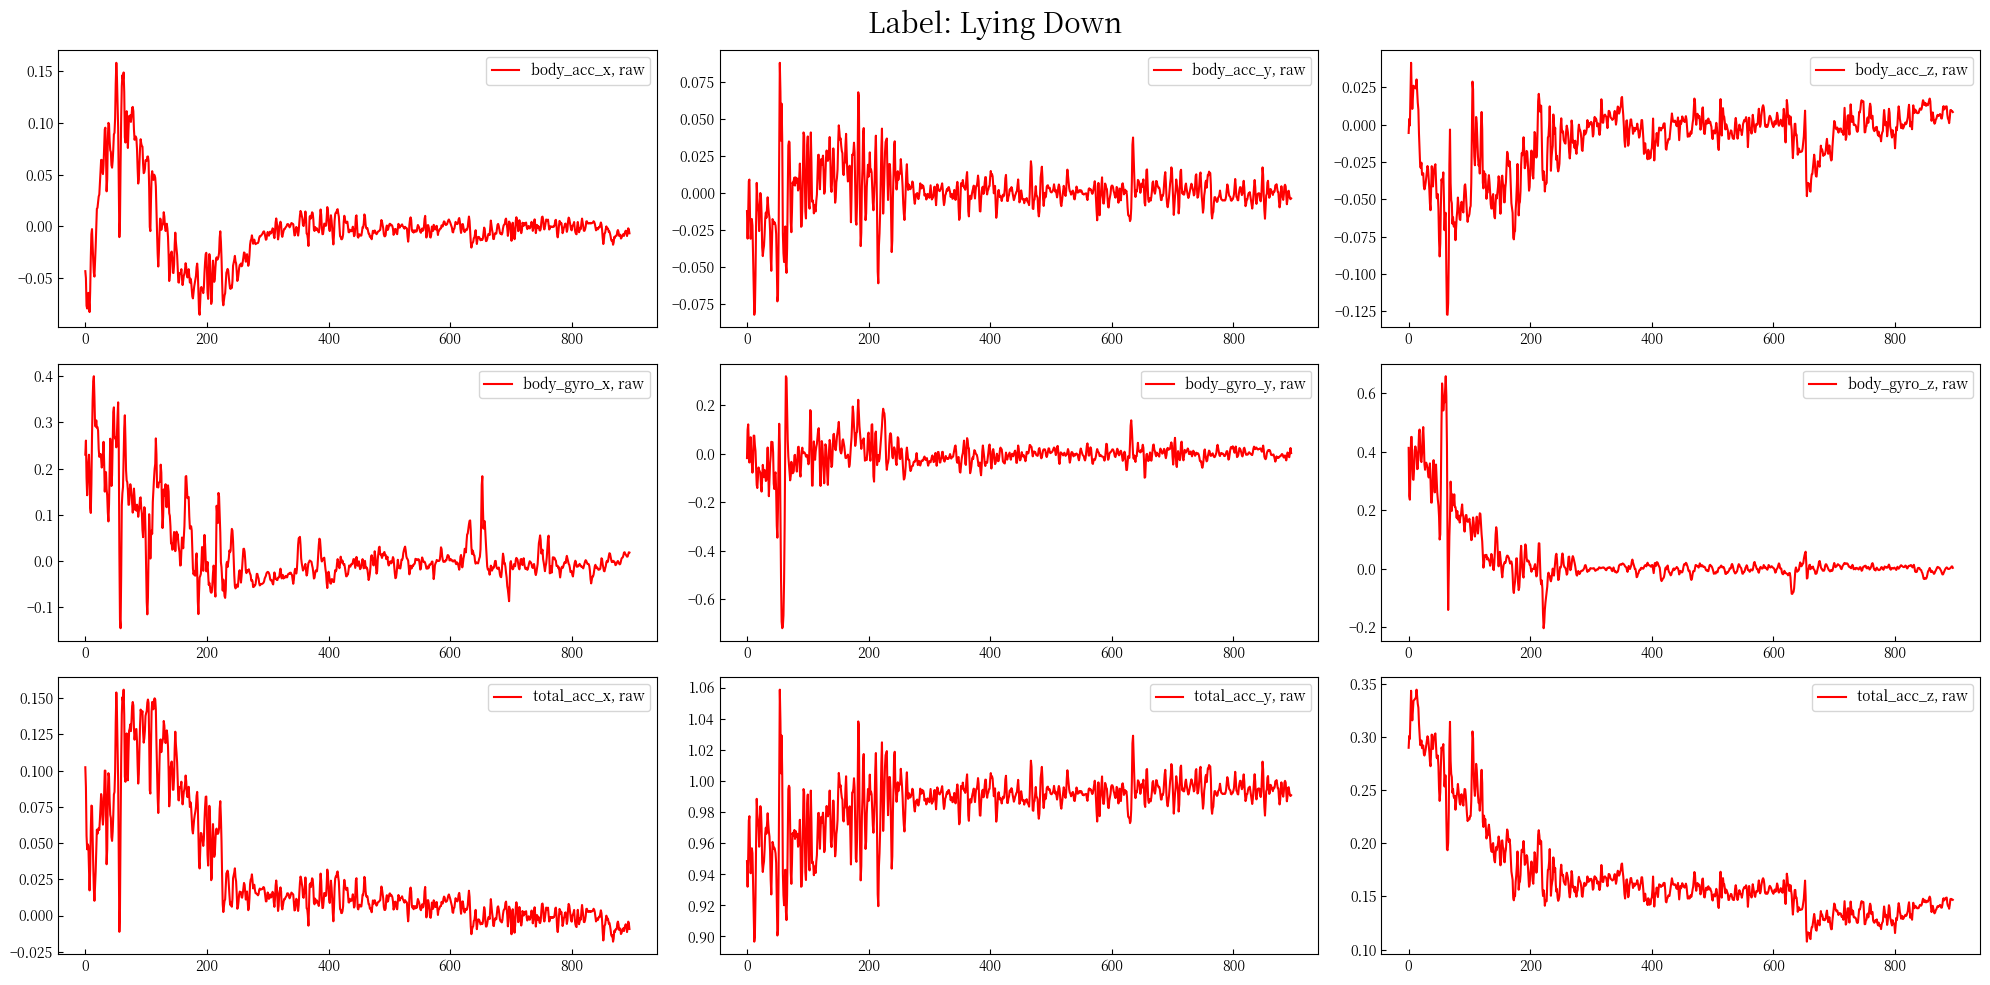

In [15]:
dx = 11
for ixx in l5[dx:dx+2]:
    shiyan1(ix=ixx, num=2, hide_raw=False, random=False)